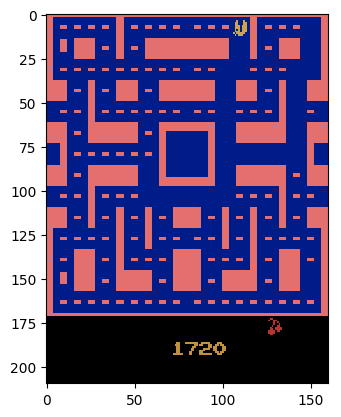

True


In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MsPacman-v0")
#env.reset()
#state = env.step(1)
plt.style.use('default')
plt.imshow(state[0])
plt.show()
print(state[2])

In [2]:
state[0].shape

(210, 160, 3)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    
    
    
    self.l1 = nn.Conv2d(in_channels=3, out_channels=1,kernel_size = 3)
    self.l2 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size = 3)
    self.l3 = nn.Linear(51, 8) # 1*38
    
    self.l4 = nn.Linear(304, 8) # 1*38
  def forward(self,state):
    
    x = state[0]## picture
    x = x.swapaxes(2,0)#swap for depth
    x = torch.tensor(x, dtype = torch.float).view(1,3, 160, 210)
    # process raw output to  something this can eat
    
    x = self.l1(x)
    x = F.max_pool2d(x, 2)
    x = F.relu(x) 
    x = self.l2(x)
    x = F.max_pool2d(x, 2) 
    x = F.relu(x)
    x = self.l3(x)
    x = x.view(304)
    x = self.l4(x)
    x = torch.softmax(x,0)

    return x
  
jerry = Model()

In [0]:
optimizer = torch.optim.Adam(jerry.parameters(),lr = 0.1)

tensor(1., requires_grad=True)
tensor(0.0323, requires_grad=True)
tensor(0.0110, requires_grad=True)
tensor(0.0110, requires_grad=True)
tensor(0.0110, requires_grad=True)
tensor(0.0099, requires_grad=True)
tensor(0.0062, requires_grad=True)
tensor(0.0047, requires_grad=True)
tensor(0.0036, requires_grad=True)
tensor(0.0036, requires_grad=True)
tensor(0.0036, requires_grad=True)
True
tensor(1., requires_grad=True)
tensor(0.0476, requires_grad=True)
tensor(0.0123, requires_grad=True)
tensor(0.0123, requires_grad=True)
tensor(0.0076, requires_grad=True)
tensor(0.0076, requires_grad=True)
tensor(0.0045, requires_grad=True)
tensor(0.0032, requires_grad=True)
tensor(0.0029, requires_grad=True)
tensor(0.0029, requires_grad=True)
True
tensor(1., requires_grad=True)
tensor(0.0909, requires_grad=True)
tensor(0.0141, requires_grad=True)
tensor(0.0141, requires_grad=True)
tensor(0.0141, requires_grad=True)
tensor(0.0090, requires_grad=True)
tensor(0.0071, requires_grad=True)
tensor(0.0071, require

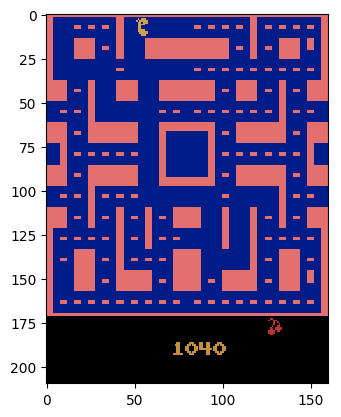

In [87]:
for epoch in range(5):
  env.reset()
  state = env.step(1)
  i = 0
  score = 0
  while state[2] == False:  
    screen = state[0]
    score += state[1]
    out = jerry.forward(state).detach().numpy()
    out = np.argmax(out)
    state = env.step(out)
    i+=1
    if i%50== 0:

      loss = torch.tensor(1/(score+1),requires_grad=True)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      print(loss)
  print(state[2])
plt.imshow(state[0])
plt.show()